# Exercício Regressão Linear com PyTorch

Este notebook é um exercício baseado no notebook:
- [LinearRegressionIrisNumPy.ipynb](LinearRegressionIrisNumPy.ipynb) feito em NumPy,

O objetivo desse notebook é reescrevê-lo porém utilizando tensores do PyTorch.

Os nomes das funções do PyTorch são próximas das funções do Torch original escrito
na linguagem Lua, porém não são iguais.

## Importação dos pacotes

In [3]:
%matplotlib inline
import torch

import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

torch.manual_seed(1234)

def print_assert(r):
    if r:
        return 'OK!'
    else:
        return 'Incorreto!'

## Dataset

### Leitura dos dados

In [4]:
iris = load_iris()
data = iris.data[iris.target==1,::2]  # comprimento das sépalas e pétalas, indices 0 e 2

x_train = torch.FloatTensor(data[:,0:1])
y_train = torch.FloatTensor(data[:,1:2])

n_samples = x_train.size(0)
print('x_train.shape:',x_train.shape, type(x_train))
print('y_train.shape:',y_train.shape, type(y_train))

print('x_train[:5]:\n', x_train[:5])
print('y_train[:5]:\n', y_train[:5])

x_train.shape: torch.Size([50, 1]) <class 'torch.FloatTensor'>
y_train.shape: torch.Size([50, 1]) <class 'torch.FloatTensor'>
x_train[:5]:
 
 7.0000
 6.4000
 6.9000
 5.5000
 6.5000
[torch.FloatTensor of size 5x1]

y_train[:5]:
 
 4.7000
 4.5000
 4.9000
 4.0000
 4.6000
[torch.FloatTensor of size 5x1]



### Normalização dos dados

In [5]:
x_train -= x_train.min()
x_train /= x_train.max()
y_train -= y_train.min()
y_train /= y_train.max()

### Exercício 1 - criação do `x_train_bias`

faça o `x_train_bias` ser uma matriz com zeros na primeira coluna e x_train na segunda coluna.

Dica: você pode precisar da função [torch.cat](http://pytorch.org/docs/master/torch.html#torch.cat) e [torch.ones](http://pytorch.org/docs/master/torch.html#torch.ones).

In [11]:
x_train_bias = torch.cat((torch.ones(n_samples, 1), x_train), dim=1)
#x_train_bias = torch.ones(n_samples, 1)
print(x_train_bias.size())
x_train_bias

torch.Size([50, 2])



 1.0000  1.0000
 1.0000  0.7143
 1.0000  0.9524
 1.0000  0.2857
 1.0000  0.7619
 1.0000  0.3810
 1.0000  0.6667
 1.0000  0.0000
 1.0000  0.8095
 1.0000  0.1429
 1.0000  0.0476
 1.0000  0.4762
 1.0000  0.5238
 1.0000  0.5714
 1.0000  0.3333
 1.0000  0.8571
 1.0000  0.3333
 1.0000  0.4286
 1.0000  0.6190
 1.0000  0.3333
 1.0000  0.4762
 1.0000  0.5714
 1.0000  0.6667
 1.0000  0.5714
 1.0000  0.7143
 1.0000  0.8095
 1.0000  0.9048
 1.0000  0.8571
 1.0000  0.5238
 1.0000  0.3810
 1.0000  0.2857
 1.0000  0.2857
 1.0000  0.4286
 1.0000  0.5238
 1.0000  0.2381
 1.0000  0.5238
 1.0000  0.8571
 1.0000  0.6667
 1.0000  0.3333
 1.0000  0.2857
 1.0000  0.2857
 1.0000  0.5714
 1.0000  0.4286
 1.0000  0.0476
 1.0000  0.3333
 1.0000  0.3810
 1.0000  0.3810
 1.0000  0.6190
 1.0000  0.0952
 1.0000  0.3810
[torch.FloatTensor of size 50x2]

In [12]:
# Verificação do exercício - Execute para testar sua implementação

print('x_train_bias é um tensor: {}'.format(print_assert(
    isinstance(x_train_bias, torch.FloatTensor)
)))

    
print('tamanho do x_train_bias: {}'.format(print_assert(
    x_train_bias.size() == torch.Size([50, 2])
)))

print('primeira coluna é só de uns: {}'.format(print_assert(
    (x_train_bias[:, 0] - torch.ones(n_samples)).sum() == 0
)))

print('segunda coluna é igual a x_train: {}'.format(print_assert(
    (x_train_bias[:, 1] - x_train).sum() == 0
)))

x_train_bias é um tensor: OK!
tamanho do x_train_bias: OK!
primeira coluna é só de uns: OK!
segunda coluna é igual a x_train: OK!


## Modelo da rede

### Definição da classe

In [13]:
class Net():
    def __init__(self, n_in, n_out):
        self.w = torch.Tensor(n_out, n_in)
        self.w.uniform_(-0.1,0.1) #inicialização dos parâmetros
    
    def forward(self, x_bias):
        return x_bias.matmul(torch.t(self.w)) ## AQUI
    

### Instanciando a rede

In [14]:
model = Net(2,1)

### Testando o predict da rede

In [15]:
#model.forward(torch.ones((4,2)))
model.forward(torch.randn(4,2))


-0.1034
 0.0705
-0.0052
-0.0229
[torch.FloatTensor of size 4x1]

## Treinamento

### Exercício 2 - Treinamento

Refaça o código de treinamento da rede, mas agora utilizando somente Tensores do PyTorch. Faça o mesmo procedimento que o notebook [LinearRegressionIrisNumPy](LinearRegressionIrisNumPy.ipynb). Para consultar as operações disponíveis no PyTorch use a [documentação do PyTorch](http://pytorch.org/docs/master/torch.html).

Funções que podem ser úteis:
- torch.t
- torch.mean
- torch.matmul

In [17]:
y_pred = model.forward(x_train_bias)

In [18]:
y_pred


-0.1138
-0.1082
-0.1129
-0.0998
-0.1092
-0.1017
-0.1073
-0.0942
-0.1101
-0.0970
-0.0951
-0.1035
-0.1045
-0.1054
-0.1007
-0.1110
-0.1007
-0.1026
-0.1064
-0.1007
-0.1035
-0.1054
-0.1073
-0.1054
-0.1082
-0.1101
-0.1120
-0.1110
-0.1045
-0.1017
-0.0998
-0.0998
-0.1026
-0.1045
-0.0989
-0.1045
-0.1110
-0.1073
-0.1007
-0.0998
-0.0998
-0.1054
-0.1026
-0.0951
-0.1007
-0.1017
-0.1017
-0.1064
-0.0961
-0.1017
[torch.FloatTensor of size 50x1]

In [25]:
num_epochs = 100
learning_rate = 0.5

for epoch in range(num_epochs):
    # forward - predict
    y_pred = model.forward(x_train_bias)

    #loss cálculo da função de perda
    loss = torch.mean((y_pred - y_train)**2)
    
    # cálculo do gradiente pelas derivadas parciais
    w_grad = (2.0/n_samples) * x_train_bias.t().matmul(x_train_bias.matmul(model.w.t()) - y_train)

    # gradiente descendente
    model.w = model.w - learning_rate * w_grad.t()

    # verbose
    if (epoch+1) % 20 == 0:
        print('Epoch[{}/{}], loss: {:.6f}'
              .format(epoch+1, num_epochs, loss))

Epoch[20/100], loss: 0.021169
Epoch[40/100], loss: 0.021169
Epoch[60/100], loss: 0.021169
Epoch[80/100], loss: 0.021169
Epoch[100/100], loss: 0.021169


### Valor ótimo, solução analítica

## Avaliação

### Predict

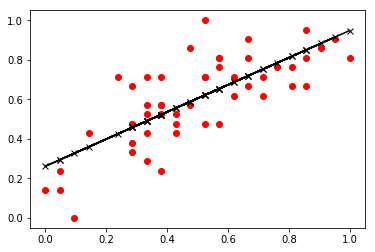

In [26]:
y_pred = model.forward(x_train_bias)
plt.plot(x_train.numpy(), y_train.numpy(), 'ro', label='Original data')
plt.plot(x_train.numpy(), y_pred.numpy(), 'kx-', label='Fitting Line')
plt.show()

### Parâmetro treinado

In [27]:
print(model.w)


 0.2613  0.6865
[torch.FloatTensor of size 1x2]



In [30]:
x_bias = x_train_bias
y = y_train
w_opt = (torch.inverse(x_bias.t().mm(x_bias)).mm(x_bias.t())).mm(y)
print(w_opt.t())


 0.2613  0.6865
[torch.FloatTensor of size 1x2]

